In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Collection

In [112]:
file_path = "/content/drive/MyDrive/DS-Lab-CS21B2018/iris.csv"
iris_df = pd.read_csv(file_path)
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [113]:
print("Total size:", len(iris_df))

Total size: 150


# Data Analysis

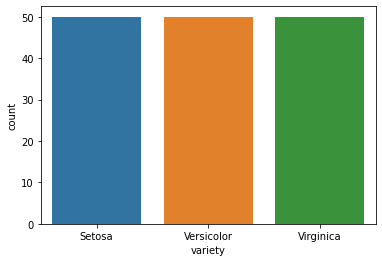

In [25]:
sns.countplot(data=iris_df, x='variety')

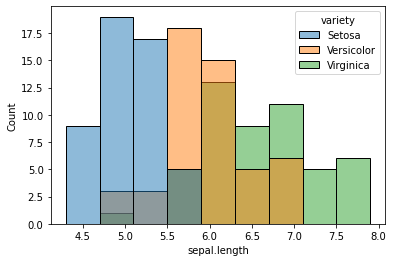

In [26]:
sns.histplot(data=iris_df, x='sepal.length', hue='variety')

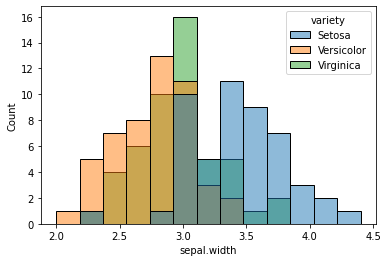

In [27]:
sns.histplot(data=iris_df, x='sepal.width', hue='variety')

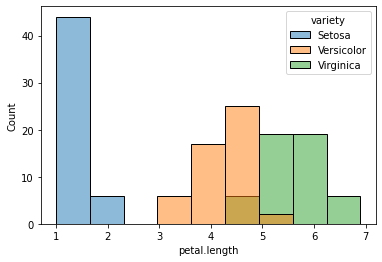

In [28]:
sns.histplot(data=iris_df, x='petal.length', hue='variety')

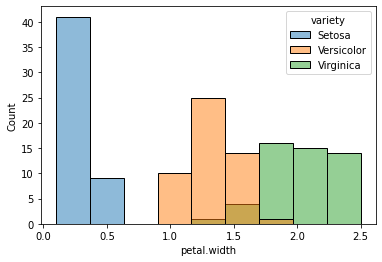

In [29]:
sns.histplot(data=iris_df, x='petal.width', hue='variety')

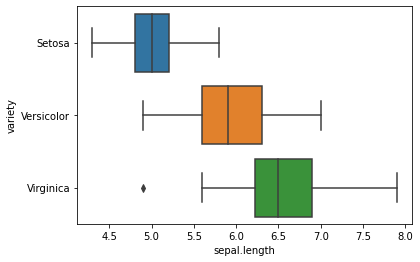

In [30]:
sns.boxplot(data=iris_df, x='sepal.length', y='variety')

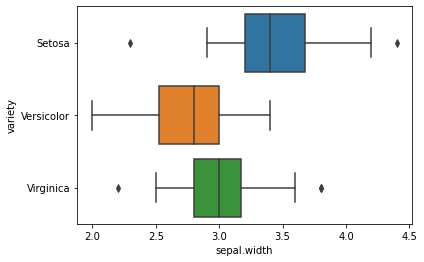

In [31]:
sns.boxplot(data=iris_df, x='sepal.width', y='variety')

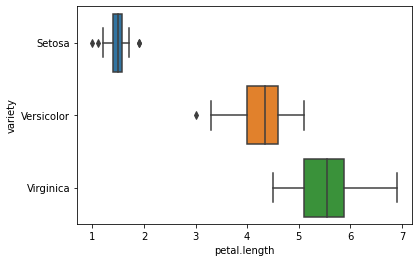

In [32]:
sns.boxplot(data=iris_df, x='petal.length', y='variety')

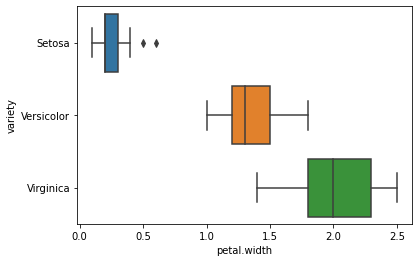

In [33]:
sns.boxplot(data=iris_df, x='petal.width', y='variety')

In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Wrangling

In [45]:
iris_df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder
variety = LabelEncoder().fit_transform(iris_df['variety'])
iris_df['variety'] = variety
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = iris_df.drop('variety', axis=1)
scaler.fit(x)
scaled_features = scaler.transform(x)

scaled_x = pd.DataFrame(scaled_features, columns=x.columns)

# Linear Regression

## Train and Test model

In [150]:
x = scaled_x
y = iris_df['variety']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [144]:
def predict_iris(y_val, threshold=1/2):
    pred = []
    for i in y_val:
        if i < threshold:
            pred.append(0)
        elif i > 1+threshold:
            pred.append(2)
        else:
            pred.append(1)
    return np.array(pred)

In [152]:
y_pred_val = model.predict(x_test)
y_pred = predict_iris(y_pred_val)
print(f"Predicted regression value: {y_pred_val}")
print(f"Predicted result: {y_pred}")

Predicted regression value: [-1.27013475e-01 -3.56333823e-02  1.87968192e+00 -1.75792967e-02
  1.27529562e+00 -8.33795266e-02  1.25752413e+00  6.69609230e-02
  1.64732408e+00  1.78515741e+00  1.66955441e+00 -1.52189818e-02
  1.22887076e+00  1.71569668e+00  1.54901907e+00  1.73392752e+00
  1.69192581e+00  1.19483994e+00  9.56475866e-01  1.17127419e+00
  1.34575287e+00  1.15572843e+00  1.95642800e+00 -2.36208380e-02
  1.14300926e+00  8.53238538e-01  1.32231273e-01 -7.68652503e-04
 -2.29784530e-01  1.58555858e+00]
Predicted result: [0 0 2 0 1 0 1 0 2 2 2 0 1 2 2 2 2 1 1 1 1 1 2 0 1 1 0 0 0 2]


## Performance Analysis

In [153]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test, y_pred)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 1.0


In [154]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")
print("       [[sepal.lentgh sepal.witdh petal.length petal.width]]")

Intercept: 0.9897498441610814
Slope: [-0.08718467 -0.02394326  0.3972123   0.45205106]
       [[sepal.lentgh sepal.witdh petal.length petal.width]]


Text(0.5, 1.0, 'Prediction')

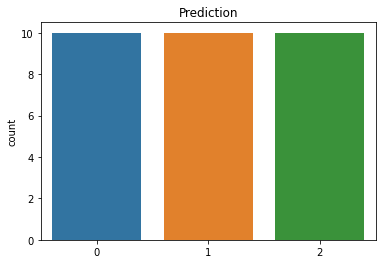

In [155]:
sns.countplot(x=y_pred).set_title('Prediction')

Text(0.5, 1.0, 'Ground Truth')

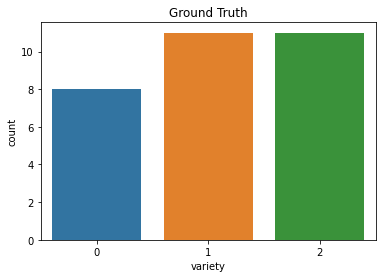

In [149]:
sns.countplot(x=y_test).set_title('Ground Truth')

# Logistic Regression

## Train and Test Model

In [156]:
x = scaled_x
y = iris_df['variety']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [157]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train, y_train)

In [158]:
y_pred= model.predict(x_test)
print("Predicted result:", y_pred)

Predicted result: [0 1 0 1 1 0 0 2 2 0 0 0 2 2 2 1 0 0 1 1 1 2 1 1 0 0 1 0 1 0]


## Performance Analysis

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        10
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [160]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[13  0  0]
 [ 0 10  0]
 [ 0  1  6]]


In [161]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9666666666666667


Text(0.5, 1.0, 'Prediction')

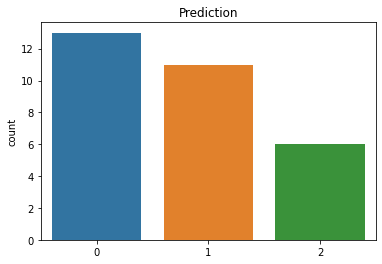

In [162]:
sns.countplot(x=y_pred).set_title('Prediction')

Text(0.5, 1.0, 'Ground Truth')

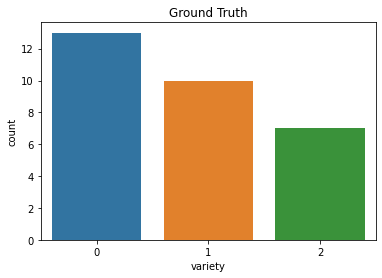

In [163]:
sns.countplot(x=y_test).set_title('Ground Truth')